# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
dataset = pd.read_csv('C:/Users/Александр/DataspellProjects/Yandex/machine_learning_1/datasets/real_estate_data.csv',
                      sep='\t')
pd.set_option('display.max_rows', 30)
display(dataset.head(20))
display(dataset.shape[0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


23699

После просмотра первых 20 строк, можно уже заметить много пропущенных значений(например высота потолков), хотя для такой таблицы эти данные одни из самых важных. Также можно обратить на то, что кол-во данных достаточно много (23699 строк).

### Предобработка данных

In [22]:
#display(dataset.info())
display(dataset.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

###  1.Найдите и изучите пропущенные значения в столбцах:


Можно заметить следующие пропущеные значения, которые можно заполнить:
 - ceiling_height(высота потолков) - можно заполнить медианным значением
  - floors_total(кол-во комнат) - количество этих пропущенных значений небольшое, составляет всего 0.3% от общих данных, поэтому их можно удалить
  - lvivng_area(жилая площадь) - числовое значение, поэтому можно заполнить медианой
  - is_apartment(явл ли апартаментами) - категориальное значение, некоторые значение заполнены true или false, поэтому пропущенные можно заполнить false
  - kitchen_area также можно заполнить медианой
   - balcony -имеет целые числовые значения. Некоторые ячейки имеют значение 0, значит можно заполнить пропущенные 0.
  - locality_name можно заполнить пустой строкой
  - parks_around3000 - возможно если не указано кол-во,значит парка в радиусе 3000 нет и можно заполнить нулями.Аналогично с ponds


In [23]:
#dataset['ceiling_height'] = dataset['ceiling_height'].fillna(dataset.groupby('rooms')['ceiling_height'].transform('median'))
dataset['ceiling_height'] = dataset['ceiling_height'].fillna(dataset['ceiling_height'].median())
dataset = dataset[dataset['floors_total'].notna()]
dataset['living_area'] = dataset['living_area'].fillna(dataset['living_area'].median())
dataset['is_apartment'] = dataset['is_apartment'].fillna(False)
dataset['kitchen_area'] = dataset['kitchen_area'].fillna(dataset['kitchen_area'].median())
dataset['balcony'] = dataset['balcony'].fillna(0)
#?
dataset['locality_name'] = dataset['locality_name'].fillna('')
dataset['parks_around3000'] = dataset['parks_around3000'].fillna(0)
dataset['ponds_around3000'] = dataset['ponds_around3000'].fillna(0)

display(dataset)
display(dataset.isna().sum())
display(dataset.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,False,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,9.10,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.0,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

None

### 2. Рассмотрите типы данных в каждом столбце:
Те значения, которым стоит изменить тип данных:
 - first_day_exposition - содержит значения времени, поэтому тип datetime
 - floors_total - должна содержать значения int64
 - Аналогично parks_around3000 и ponds_arounds3000

In [35]:
dataset['first_day_exposition'] = pd.to_datetime(dataset['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
dataset['floors_total'] = dataset['floors_total'].astype('int64')
dataset['floor'] = dataset['floor'].astype('int64')
dataset['parks_around3000'] = dataset['parks_around3000'].astype('int64')
dataset['ponds_around3000'] = dataset['ponds_around3000'].astype('int64')
#dataset['days_exposition'] = dataset['days_exposition'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23414 non-null  float64       
 5   ceiling_height        23609 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

None

In [25]:
dataset

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.0,9,False,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,9.10,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


### 3.Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

Так как начало значений locality_name имеет в самом начале неявные дубликаты, а уникальные значения только в конце, можно оставить только суть, то есть последнее слово значений столбца locality_name

In [39]:
dataset.drop_duplicates()
dataset['locality_name'].unique()
dataset['locality_name'] = dataset['locality_name'].str.split(' ').str[-1]
print(dataset['locality_name'].sort_values().unique())
dataset
tmp = dataset.query('locality_name == ""')
tmp

['' 'Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск' 'Бор' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Верево' 'Вещево' 'Виллози'
 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово' 'Володарское'
 'Волосово' 'Волхов' 'Вруда' 'Всеволожск' 'Выборг' 'Вырица' 'Выскатка'
 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина' 'Гладкое'
 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки' 'Горка' 'Гостилицы'
 'Грива' 'Громово' 'Девяткино' 'Дзержинского' 'Долина' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Ижора' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы'
 'Кальтино' 'Каменногорск' 'Камышовка' 'Кара' 'Карлино' 'Каськово'
 'Келози' 'Кикерино' 'Кингисепп' 'Кингисеппский' 'Кипень' 'Кириши'
 'Кировск' 'Кирпичное' 'Кисельня' 'Кобралово' 'Кобринское' 'Колпаны'
 'Ко

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_price,day_of_week,month_of_exposition,year_of_exposition,type_of_floor,cityCentre_km,day
1097,3,8600000.0,81.7,2016-04-15,3.0,3.55,5,50.8,2,False,...,0,NaN,147.0,105263.157895,4,4,2016,другое,4.0,15
2033,6,5398000.0,80.0,2017-05-30,3.0,2.65,4,42.6,2,False,...,0,NaN,34.0,67475.000000,1,5,2017,другое,NaN,30
2603,20,3351765.0,42.7,2015-09-20,1.0,2.65,24,15.6,3,False,...,1,374.0,276.0,78495.667447,6,9,2015,другое,17.0,20
2632,2,5130593.0,62.4,2015-10-11,2.0,2.65,24,33.1,21,False,...,1,374.0,256.0,82221.041667,6,10,2015,другое,17.0,11
3574,10,4200000.0,46.5,2016-05-28,2.0,2.65,5,30.8,5,False,...,1,603.0,45.0,90322.580645,5,5,2016,последний,8.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,2,5886750.0,83.5,2018-07-30,2.0,2.65,9,36.6,2,False,...,0,NaN,169.0,70500.000000,0,7,2018,другое,NaN,30
22474,7,24000000.0,128.0,2015-07-24,4.0,2.75,6,68.4,6,False,...,3,561.0,436.0,187500.000000,4,7,2015,последний,2.0,24
22717,9,3000000.0,35.0,2018-01-02,1.0,2.60,16,16.0,7,False,...,0,NaN,75.0,85714.285714,1,1,2018,другое,NaN,2
22933,20,3176015.0,33.3,2015-04-22,1.0,2.65,23,15.4,22,False,...,1,374.0,427.0,95375.825826,2,4,2015,другое,17.0,22


### 4.Найдите и устраните редкие и выбивающиеся значения.

В случае с ceiling_height изменяются строки, где потолки больше 15 метров(деляться на 10). Также найден такой размер потолков как 1 метр или 11,12,13,14 метров. Можно заменить данные значения на максимум(9) или минимум(2 метра), а можно заменить на нулевое значение, чтобы не запутаться и не испортить дальнейший анализ. Также решено было назвать кол-во комнат, равное 0 и большее 12 аномальным. Выведя уникальные значения parks_nearest, можно увидеть необычо огромные значения. Поэтому решено было просто отбросить значения больше 100(не знаю насколько это правильно..).Остальные значения в норме.

In [42]:
dataset['ceiling_height'] = dataset['ceiling_height'].where(dataset['ceiling_height'] <= 15,
                                                            np.round(dataset['ceiling_height'] / 10, 1))
dataset['rooms'] = dataset['rooms'].where(~(dataset['rooms'] > 12), np.nan)
dataset['rooms'] = dataset['rooms'].where(dataset['rooms'] > 0, np.nan)
dataset['ceiling_height'] = dataset['ceiling_height'].where(
    (dataset['ceiling_height'] > 1) & (dataset['ceiling_height'] < 10), np.nan)
# dataset['parks_nearest'] = dataset['parks_nearest'].where(dataset['parks_nearest']>100,np.nan)


#data['rooms'] = data['rooms'].astype('Int64')
#display(dataset['rooms'].sort_values().unique())
#display(dataset['parks_around3000'].sort_values().unique())
#display(dataset['ponds_around3000'].sort_values().unique())
#display(dataset['ceiling_height'].sort_values().unique())
# спросить про странно большие значения
print(dataset['parks_nearest'].sort_values().unique())
#display(dataset['airports_nearest'].sort_values().unique())
#display(dataset['total_area'].sort_values().unique())

[ 101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  112.  113.
  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.  125.
  126.  127.  128.  129.  130.  131.  132.  133.  134.  135.  136.  137.
  138.  139.  140.  141.  142.  144.  145.  146.  147.  148.  149.  150.
  151.  152.  153.  154.  155.  156.  157.  158.  159.  160.  161.  162.
  163.  164.  165.  166.  167.  168.  169.  170.  171.  172.  173.  174.
  175.  176.  177.  178.  179.  180.  181.  182.  183.  184.  185.  186.
  187.  188.  189.  190.  191.  192.  193.  194.  195.  196.  197.  198.
  199.  200.  201.  202.  203.  204.  205.  206.  207.  208.  209.  210.
  211.  212.  213.  215.  216.  217.  218.  219.  220.  221.  222.  223.
  224.  225.  226.  227.  228.  229.  230.  231.  232.  233.  234.  235.
  236.  237.  238.  239.  240.  241.  242.  243.  244.  245.  246.  247.
  248.  249.  250.  251.  252.  253.  254.  255.  256.  257.  258.  259.
  260.  261.  262.  263.  264.  265.  266.  267.  2

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
dataset['one_price'] = dataset['last_price'] / dataset['total_area']
dataset['day_of_week'] = dataset['first_day_exposition'].dt.dayofweek
dataset['month_of_exposition'] = dataset['first_day_exposition'].dt.month
dataset['year_of_exposition'] = dataset['first_day_exposition'].dt.year
dataset['type_of_floor'] = 'другое'
dataset['type_of_floor'] = dataset['type_of_floor'].where(dataset['floor'] > 1, 'первый')
dataset['type_of_floor'] = dataset['type_of_floor'].where(dataset['floor'] < dataset['floors_total'], 'последний')
dataset['cityCentre_km'] = round(dataset['cityCenters_nearest'] / 1000)
dataset

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price,day_of_week,month_of_exposition,year_of_exposition,type_of_floor,cityCentre_km
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другое,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5,34.3,4,False,...,NaN,2,574.0,558.0,92785.714286,3,8,2015,другое,14.0
3,0,64900000.0,159.00,2015-07-24,3.0,2.65,14,30.0,9,False,...,NaN,3,234.0,424.0,408176.100629,4,7,2015,другое,7.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другое,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3.0,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72490.845228,1,3,2017,другое,4.0
23695,14,3100000.0,59.00,2018-01-15,3.0,2.65,5,38.0,4,False,...,NaN,0,NaN,45.0,52542.372881,0,1,2018,другое,NaN
23696,18,2500000.0,56.70,2018-02-11,2.0,2.65,3,29.7,1,False,...,NaN,0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2.0,3.00,17,30.0,12,False,...,173.0,3,196.0,602.0,149511.400651,1,3,2017,другое,10.0


### Проведите исследовательский анализ данных

### 1.Изучите следующие параметры объектов:

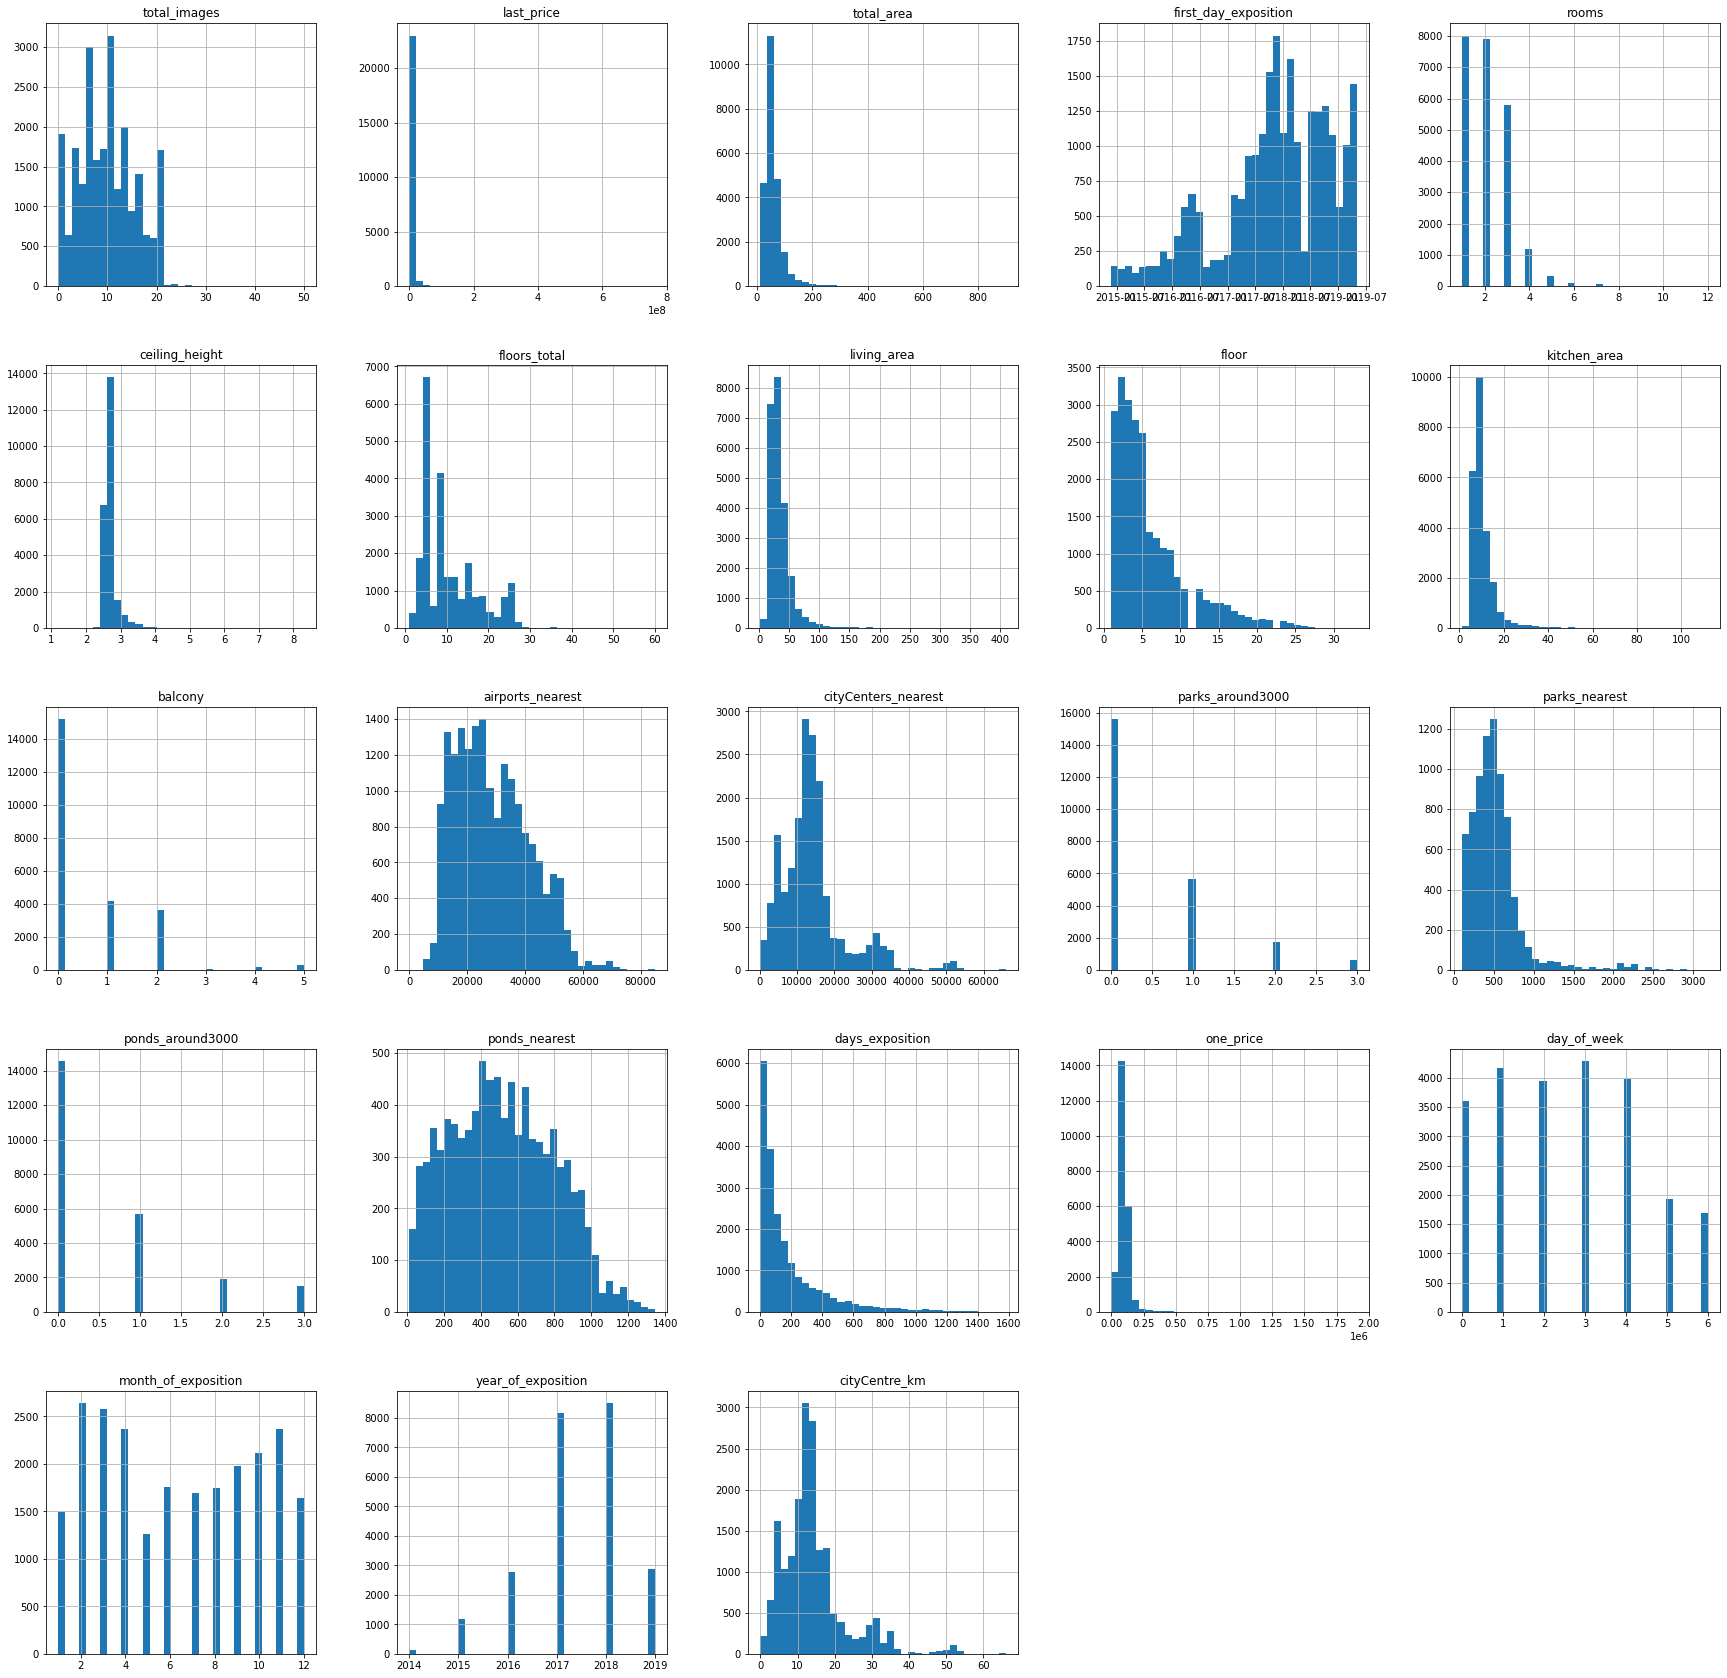

In [29]:
dataset.hist(figsize=(30, 30), bins=35);


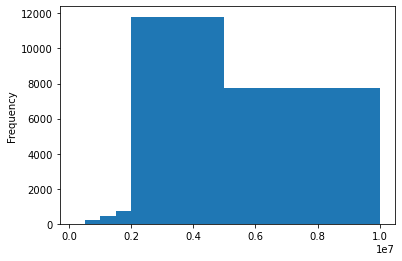

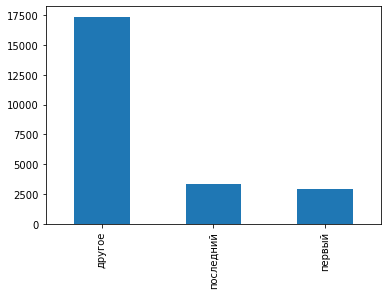

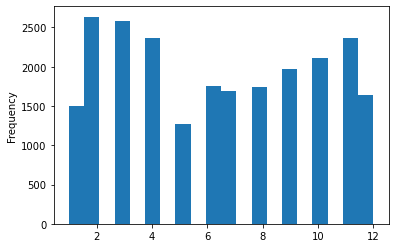

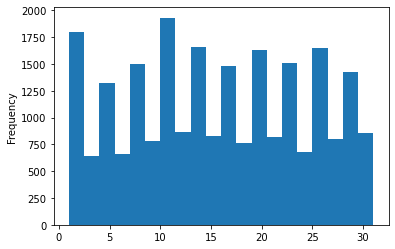

In [44]:
dataset['last_price'].plot(kind='hist', bins=[200000, 250000, 500000, 1000000, 1500000, 2000000, 5000000, 10000000])
plt.show()
dataset['type_of_floor'].value_counts().plot(kind='bar')
plt.show()
dataset['month_of_exposition'].plot(kind='hist', y='month', bins=20)
plt.show()
dataset['day'] = pd.DatetimeIndex(dataset['first_day_exposition']).day
dataset['day'].plot(kind='hist', y='day', bins=20)
plt.show()

#### Выводы по графику:
 - пик общей  площади(total area) приходиться на примерно 50
  - пик жилой площади(living area) приходиться на примерное 25
  - значение общего кол-ва этажей (floors_total) не превосходит 30. Самое распространенное кол-во этаэей в квартире -5-6
  - пик площади кухни приходитя на 10
   - last_price - На графике, построенном с другими корзинами,можно заметить что явный пик находится на 5 миллионах рублей.
  - Почти одинаково распространены однокомнотные и двухкомнатные квартиры. Но больше все-таки 1. После таких квартир, остальные, с кол-вом комнат 4, 5 и тд все меньше и меньше.
  - В основном распространена высота потолков 2.5 метра(ceiling height)
  - Пик этажа квартиры находиться на 2,3 этажах.Такие квартиры больше всего распространены Реже всего встречается квартиры на 25 этаже и выше.
 - Пик расстояния до центра при ходится примрно на 15000 метрах. Далее, кол-во квартир идет на спад.
  - Естественно, кол-во "других" этажей большей, чем первых и последних)
  - Нормальное распределение можно четко заметить на значениях total_area,Total_images,floor,first_day_exposition,airports_nearest,cityCentre_nearest,parks_nearest,ponds_nearest,cityCentre_km
    - Примерно в феврале и примерно 12 числа был пик выставления квартир на продажу.

### 2.Изучите, как быстро продавались квартиры (столбец days_exposition).

95.0

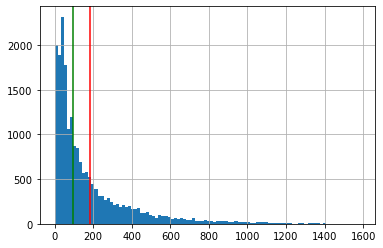

In [31]:
dataset['days_exposition'].hist(bins=100)
days_exposion_median = dataset['days_exposition'].median()
days_exposion_mean = dataset['days_exposition'].mean()
plt.axvline(x=days_exposion_median, color='green')
plt.axvline(x=days_exposion_mean, color='red')
display(days_exposion_median)

Среднее кол-во дней продажи - 95 дней. Поэтому, все, что меньше этого значения является можно считать быстрыми продажами.Их большое кол-во как можно заметить по гарфику. Редки случаи, где кол-во дней составляет от 800 дней и больше. Самые редкие те, что больше 1000.Они являются необычно долгими

### 3.Какие факторы больше всего влияют на общую (полную) стоимость объекта?

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

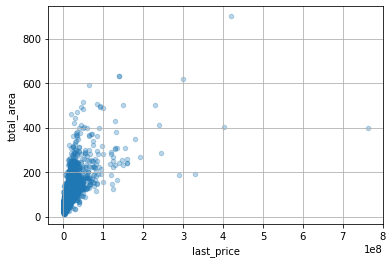

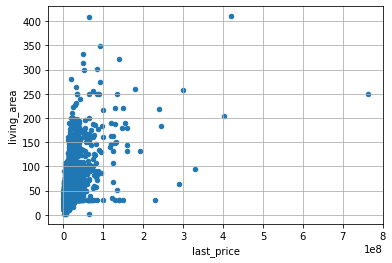

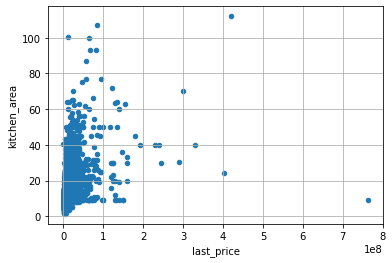

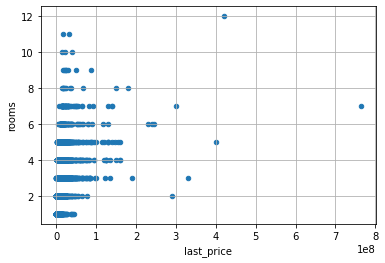

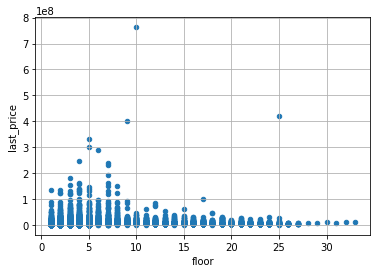

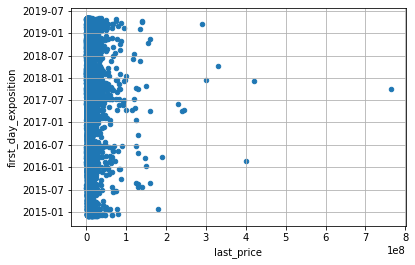

In [45]:
dataset.plot.scatter(x='last_price', y='total_area', grid=True, alpha=0.3)
dataset.plot.scatter(x='last_price', y='living_area', grid=True)
dataset.plot.scatter(x='last_price', y='kitchen_area', grid=True)
dataset.plot.scatter(x='last_price', y='rooms', grid=True)
dataset.plot.scatter(x='floor', y='last_price', grid=True)
dataset.plot.scatter(x='last_price', y='first_day_exposition', grid=True)

По построенным графикам можно сделать выводы о том, что цена:
 - достаточно сильно зависит от общей, жилой площади, а также площади кухни
  - сильно зависит от кол-ва комнат, этажа
   - не очень сильно зависит от даты размещения

### 4.Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [33]:
df = dataset.pivot_table(index='locality_name', values='one_price', aggfunc=['count', 'mean'])
display(df.sort_values(by=df.columns[0], ascending=False).head(10))
dataset_max = dataset['one_price'].max()
dataset_min = dataset['one_price'].min()
print('Самая высокая цена за кв метр:', dataset.query('one_price==@dataset_max')['locality_name'])
print('Самая низкая цена за кв метр:', dataset.query('one_price==@dataset_min')['locality_name'])

,count,mean
,one_price,one_price
locality_name,,
Санкт-Петербург,15651,114868.877341
Мурино,586,86041.116064
Кудрово,470,95260.846171
Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458


Самая высокая цена за кв метр: 12971    Санкт-Петербург
Name: locality_name, dtype: object
Самая низкая цена за кв метр: 8793    Санкт-Петербург
Name: locality_name, dtype: object


### 5.Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

<AxesSubplot:xlabel='cityCentre_km'>

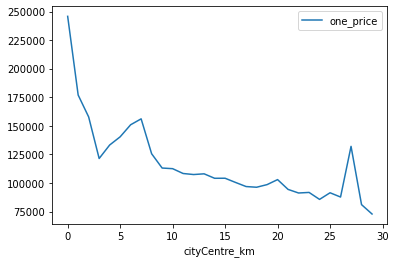

In [34]:
dataset.query('locality_name=="Санкт-Петербург"').pivot_table(index='cityCentre_km', values='one_price',
                                                              aggfunc='mean').plot()

Вывод: чем дальше от цента, тем дешевле.После 2-3 км цена начинает резко идти вниз, что значит о том, что это пиковое значение. Далее спад идет плавно.

### Общий вывод

Была проведена предобработка данных. Это немалая работа по очищению лишних, аномальных(например ceiling_height), пропущенных данных и дубликатов или, также по замене их на другие данные, опираясь на просмотр и наблюдение за данными. Также было проведено иследнование данных. Тут  было важно внимательно изучить графики, пики, распределение а также найти зависимоти и сделать логические выводы. Было выяснено, что все-таки цена очень сильно зависит от расположения(кол-во ближайших парков и прудов), кол-ва комнат, этажа и конечно же, очень сильно зависит от расположения к центру.Удивительно, что немало квартир находится рядом с прудами(пик в 400м) и рядом с парками(пик в 500м). Также по мнению крокера 3км- это центр.2

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [+]  открыт файл
- [+]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [+]  определены пропущенные значения
- [+]  заполнены пропущенные значения там, где это возможно
- [+]  есть пояснение, какие пропущенные значения обнаружены
- [+]  изменены типы данных
- [+]  есть пояснение, в каких столбцах изменены типы и почему
- [+]  устранены неявные дубликаты в названиях населённых пунктов
- [+]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [+]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [+]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [+]  посчитано и добавлено в таблицу: месяц публикации объявления
- [+]  посчитано и добавлено в таблицу: год публикации объявления
- [+]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [+]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [+]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [+]  построены гистограммы для каждого параметра
- [+]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [+]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [+]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [+]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [+]  в каждом этапе есть промежуточные выводы
- [+]  есть общий вывод